# Import libraries

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.7 MB/s eta 0:00:0000:0100:010m
  Preparing metadata (setup.py) ... done
  Created wheel for lxml: filename=lxml-4.9.1-cp310-cp310-macosx_11_0_arm64.whl size=1424324 sha256=44808395674f36631790133833705e08ee6310d990d762a35773db95a0ae1efc
  Stored in directory: /Users/camilleko/Library/Caches/pip/wheels/a4/ec/7b/8acde6da24b5aabeee049213d5bec12d1e9214d3cae276387b
Successfully built lxml


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os
import yfinance as yf
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
%matplotlib inline

In [3]:
np.random.seed(42)


In [4]:
def load(symbol,start_date,end_date):
  df = yf.download(symbol, start=start_date, end=end_date)
  newdf = df.reset_index()
  return newdf

In [5]:
symbol ='BKNG'
stock_company = 'Booking Holdings Inc'

start_date = '2018-01-01'
end_date =  '2022-11-20'

df = load(symbol,start_date, end_date)
print(df.head())

[*********************100%***********************]  1 of 1 completed
        Date         Open         High          Low        Close    Adj Close  \
0 2018-01-02  1750.089966  1790.660034  1744.500000  1784.750000  1784.750000   
1 2018-01-03  1790.229980  1829.020020  1785.000000  1824.160034  1824.160034   
2 2018-01-04  1838.540039  1848.900024  1802.030029  1807.250000  1807.250000   
3 2018-01-05  1820.180054  1825.500000  1805.800049  1823.540039  1823.540039   
4 2018-01-08  1827.489990  1874.949951  1825.189941  1851.810059  1851.810059   

   Volume  
0  475500  
1  525000  
2  592600  
3  358600  
4  555600  


In [6]:
df = df.drop(columns='Adj Close')

In [7]:
df.shape

(1231, 6)

In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

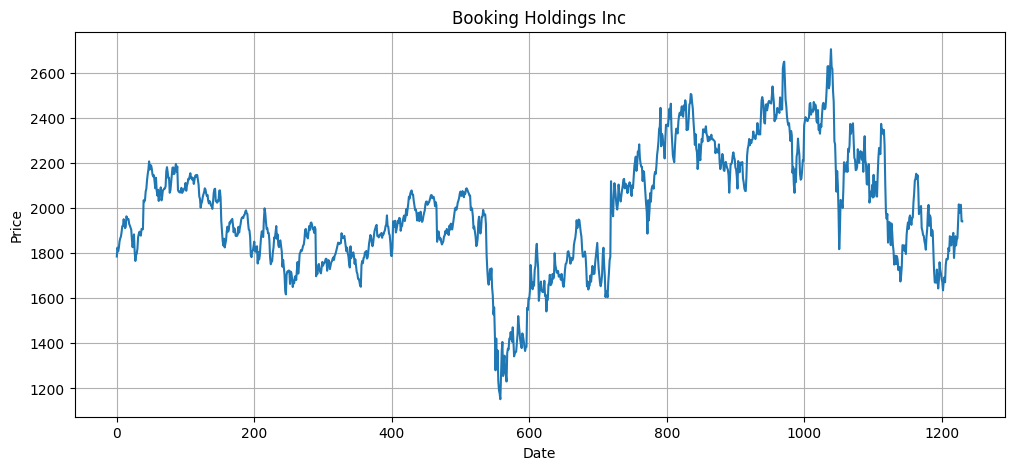

In [9]:
df['Close'].plot(figsize=(12, 5))
plt.title(stock_company)
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid()
plt.show()

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [11]:
df.shape
print(df.head())

        Date         Open         High          Low        Close  Volume
0 2018-01-02  1750.089966  1790.660034  1744.500000  1784.750000  475500
1 2018-01-03  1790.229980  1829.020020  1785.000000  1824.160034  525000
2 2018-01-04  1838.540039  1848.900024  1802.030029  1807.250000  592600
3 2018-01-05  1820.180054  1825.500000  1805.800049  1823.540039  358600
4 2018-01-08  1827.489990  1874.949951  1825.189941  1851.810059  555600


In [12]:
df['S_20_O'] = df['Open'].shift(1).rolling(window=20).mean() 
df['S_20_H'] = df['High'].shift(1).rolling(window=20).mean() 
df['S_20_L'] = df['Low'].shift(1).rolling(window=20).mean() 
df['S_20_V'] = df['Volume'].shift(1).rolling(window=20).mean() 
df['S_20_C'] = df['Close'].shift(1).rolling(window=20).mean() 

df= df.dropna() 
X = df[['S_20_O', 'S_20_H', 'S_20_L', 'S_20_V', 'S_20_C']] 
X.head()


,S_20_O,S_20_H,S_20_L,S_20_V,S_20_C
20,1892.740009,1913.118488,1879.231000,453110.0,1896.668005
21,1901.636011,1920.333984,1886.806000,451975.0,1903.033008
22,1907.324011,1925.324982,1892.225500,443725.0,1907.009503
23,1909.903510,1927.879980,1894.952496,439785.0,1909.602002
24,1910.959509,1930.235480,1895.487494,449265.0,1909.721503


In [13]:
X.describe()

,S_20_O,S_20_H,S_20_L,S_20_V,S_20_C
count,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000
mean,1988.885762,2014.897663,1962.092211,415680.421140,1987.734124
std,251.955271,253.069750,249.850332,119719.293591,251.120547
min,1288.258508,1355.954492,1245.773004,214585.000000,1296.100006
25%,1819.786008,1843.691495,1797.149500,331187.500000,1820.328247
50%,1964.357495,1985.995490,1942.417505,397200.000000,1965.529504
75%,2171.496521,2202.651501,2135.454492,458400.000000,2167.699515
max,2515.562500,2556.657495,2477.310486,950035.000000,2515.435449


In [14]:
# x = df.drop(columns=['Close', 'Date'])
y = df['Close']
print(len(y))

1211


In [15]:
y.describe()

count    1211.000000
mean     1987.729597
std       263.665120
min      1152.239990
25%      1807.585022
50%      1966.849976
75%      2168.314941
max      2703.260010
Name: Close, dtype: float64

In [16]:
print(len(X))
print(len(y))


1211
1211


In [17]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2 , shuffle=False,random_state = 42)

In [18]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(968, 5)
(243, 5)
(968,)
(243,)


Regression algorithm model implementation


In [19]:
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [-7.86164424e+00 -1.34984490e+00 -3.37753741e+00 -2.34787072e-04
  1.35113995e+01]
regression intercept 216.39429439420883


Prediction and Estimation


In [20]:
regression_confidence = regression.score(test_x, test_y)
print("linear regression confidence: ", regression_confidence)


linear regression confidence:  0.6694181473831069


In [21]:
predicted=regression.predict(test_x)
print(test_x.head())


          S_20_O       S_20_H       S_20_L    S_20_V       S_20_C
988  2385.152490  2415.522986  2335.840503  456615.0  2367.596997
989  2367.452490  2398.307996  2318.597498  450265.0  2351.468494
990  2348.385486  2381.471497  2300.433997  441010.0  2331.883997
991  2329.888489  2362.984497  2281.956494  436275.0  2312.142493
992  2311.386487  2344.859998  2263.919995  434670.0  2295.092493


In [22]:
predicted.shape

(243,)

In [23]:
predicted

array([2197.54540331, 2201.74521422, 2173.2767769 , 2140.4329965 ,
       2141.28083932, 2155.87972277, 2172.89500742, 2153.25322607,
       2164.03755432, 2160.28286082, 2153.19277292, 2171.8760976 ,
       2188.11440955, 2275.95207543, 2282.80639829, 2277.53675243,
       2276.64071822, 2297.07155814, 2322.91332878, 2383.62114502,
       2359.24855313, 2429.8066116 , 2405.99492904, 2404.87722467,
       2397.79169731, 2418.2009945 , 2449.24353968, 2531.88431872,
       2528.04644636, 2556.74537707, 2582.5447994 , 2538.5271297 ,
       2508.58176013, 2448.60728281, 2381.45589055, 2411.02515547,
       2431.32161346, 2428.40275644, 2400.34464889, 2429.22808177,
       2457.84919662, 2437.12142312, 2419.87846827, 2447.69827053,
       2460.48842329, 2470.61591718, 2499.85334236, 2477.25042345,
       2526.5526315 , 2452.41016373, 2462.76633923, 2524.94929533,
       2574.4902723 , 2561.84440321, 2617.36179733, 2562.58229477,
       2506.45327029, 2565.93682041, 2572.40309779, 2493.46868

In [24]:
dfr=pd.DataFrame({'y_val':test_y, 'y_pred':predicted})
dfr.head(10)

,y_val,y_pred
988,2114.439941,2197.545403
989,2227.280029,2201.745214
990,2245.030029,2173.276777
991,2307.199951,2140.432996
992,2267.610107,2141.280839
993,2236.360107,2155.879723
994,2149.510010,2172.895007
995,2124.929932,2153.253226
996,2130.379883,2164.037554
997,2164.909912,2160.282861


In [25]:
dfr.describe()

,y_val,y_pred
count,243.000000,243.000000
mean,2084.345712,2111.190150
std,253.389353,228.111750
min,1634.609985,1667.436754
25%,1874.505005,1916.651825
50%,2080.179932,2106.249233
75%,2272.215088,2260.889132
max,2703.260010,2617.361797


Model Evaluation


In [26]:
MAE = metrics.mean_absolute_error(test_y, predicted)

MAPE = np.mean((np.abs(np.subtract(test_y, predicted)/ test_y))) * 100

MDAPE = np.median((np.abs(np.subtract(test_y, predicted)/ test_y)) ) * 100

R2 = r2_score(test_y, predicted)

print(MAE, MAPE, MDAPE, R2)

109.93690012675226 5.401495771267065 4.150911749621993 0.6694181473831069


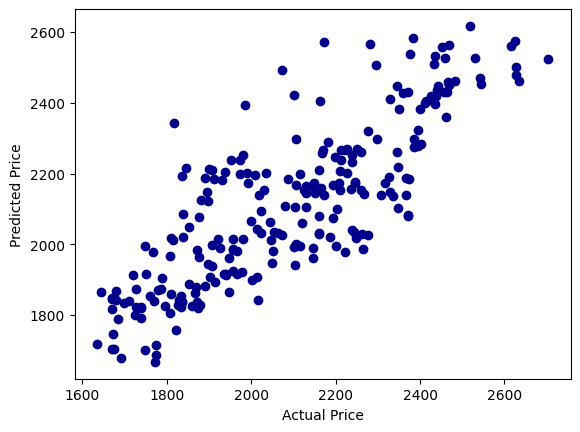

In [27]:
plt.scatter(dfr.y_val, dfr.y_pred,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

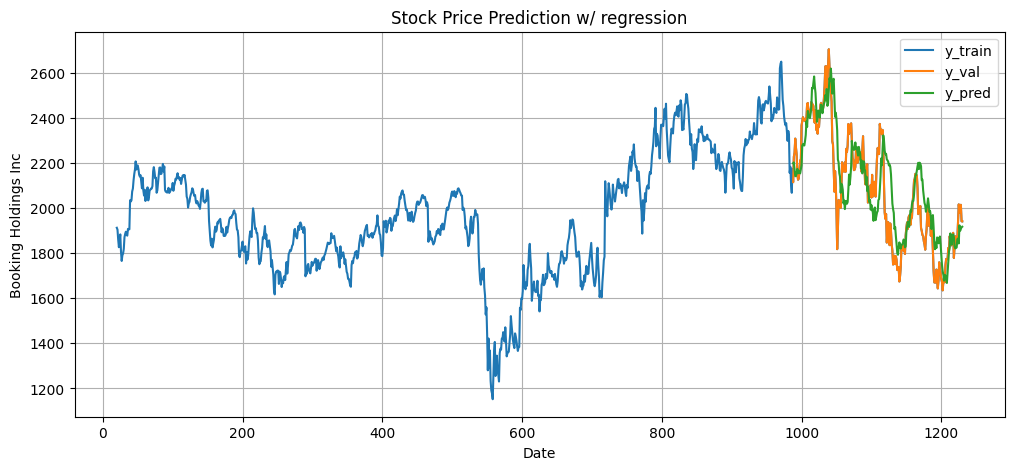

In [37]:
fig, ax1 = plt.subplots(figsize=(12, 5))
plt.plot(df['Close'],label='y_train')
plt.plot(dfr.y_val,label='y_val')
plt.plot(dfr.y_pred,label='y_pred')
plt.title(f"Stock Price Prediction w/ regression")
# sns.lineplot(data=dfr[['y_val',  'y_pred']], linewidth=1.0, dashes=False, ax=ax1)
plt.legend(['y_pred','y_val'])  
plt.xlabel("Date")  

plt.ylabel(stock_company)  
plt.grid()
plt.legend()
plt.show()